In [50]:
# problem 2.1
tails <- 0.005 / 2
critical_z_value <- qnorm(1 - tails)
critical_z_value

[1] 2.807034

In [51]:
#problem 2.2
X <- c(1.7, 1.6, 3.3, 2.7, -0.04, 0.35, -0.5, 1.0, 0.7, 0.8)
p_values <- 2 * (1 - pnorm(abs(X)))
sorted_indices <- order(p_values)
sorted_p_values <- p_values[sorted_indices]
n <- length(X)
alpha <- 0.05

critical_values <- (1:n) / n * alpha
k <- max(which(sorted_p_values <= critical_values), default = -1)

rejected_hypotheses <- sorted_indices[1:(k)]

print(sorted_p_values)
print(critical_values)
print(rejected_hypotheses)

 [1] 0.0009668483 0.0069339476 0.0891309255 0.1095985834 0.3173105079
 [6] 0.4237107972 0.4839273044 0.6170750775 0.7263386976 0.9680931263
 [1] 0.005 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050
[1] 3 4


In [52]:
install.packages("MVN")
install.packages("multcomp")
library(MASS)
library(car) 
library(ellipse)
library(multcomp)
library(MVN)
library(ggplot2)




The downloaded binary packages are in
	/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T//RtmpZ85yt1/downloaded_packages

The downloaded binary packages are in
	/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T//RtmpZ85yt1/downloaded_packages


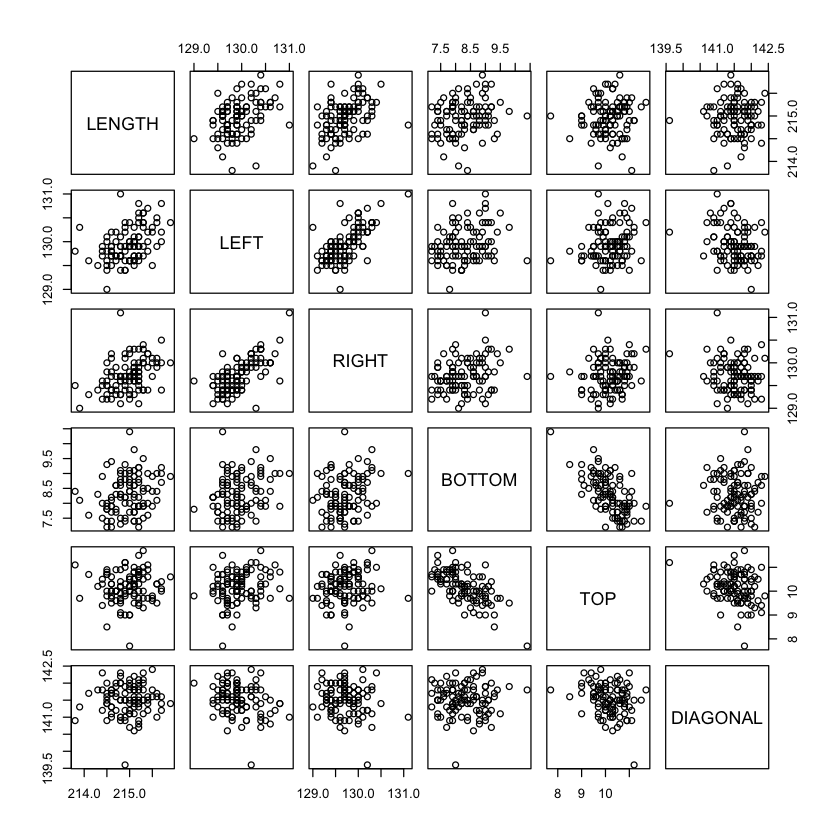

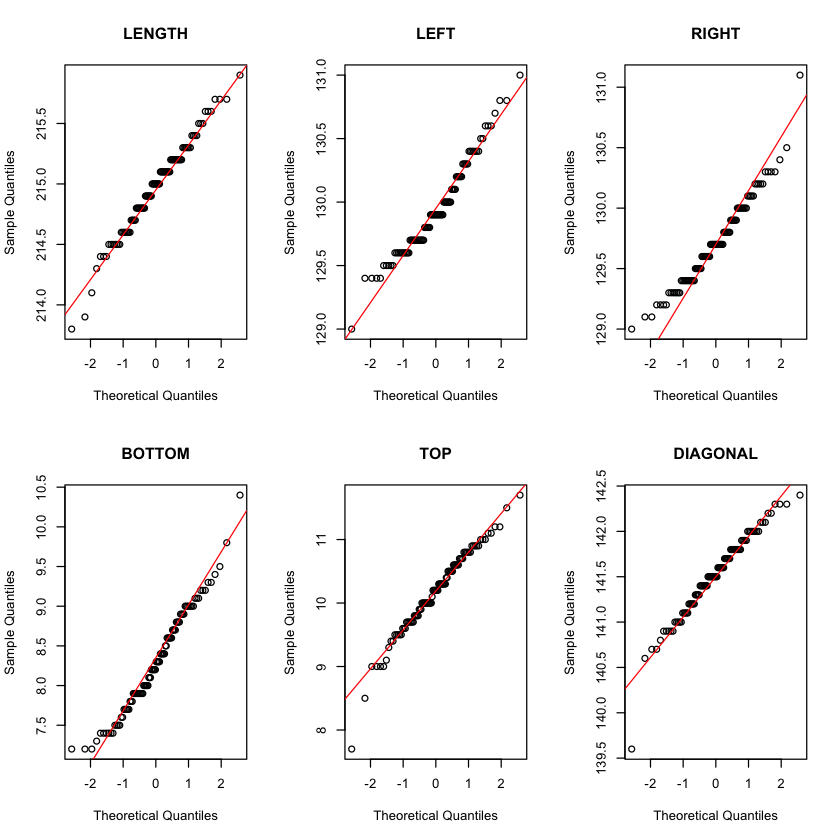

In [53]:
# project 2.1

data <- read.table("BankGenuine.txt", header=FALSE)
colnames(data) <- c("LENGTH", "LEFT", "RIGHT", "BOTTOM", "TOP", "DIAGONAL")

par(bg="white") 
pairs(data)
par(bg="white") 
par(mfrow = c(2, 3))  
for (i in 1:ncol(data)) {
  qqnorm(data[[i]], main = colnames(data)[i])
  qqline(data[[i]], col = "red")
}



In [54]:
# Project 2.2
mean_vector <- colMeans(data)
cov_matrix <- cov(data)
print(mean_vector)
print("")
cov_matrix <- cov(data)
print(cov_matrix)

  LENGTH     LEFT    RIGHT   BOTTOM      TOP DIAGONAL 
 214.969  129.943  129.720    8.305   10.168  141.517 
[1] ""
              LENGTH        LEFT       RIGHT        BOTTOM         TOP
LENGTH   0.150241414  0.05801313  0.05729293  0.0571262626  0.01445253
LEFT     0.058013131  0.13257677  0.08589899  0.0566515152  0.04906667
RIGHT    0.057292929  0.08589899  0.12626263  0.0581818182  0.03064646
BOTTOM   0.057126263  0.05665152  0.05818182  0.4132070707 -0.26347475
TOP      0.014452525  0.04906667  0.03064646 -0.2634747475  0.42118788
DIAGONAL 0.005481818 -0.04306162 -0.02377778 -0.0001868687 -0.07530909
              DIAGONAL
LENGTH    0.0054818182
LEFT     -0.0430616162
RIGHT    -0.0237777778
BOTTOM   -0.0001868687
TOP      -0.0753090909
DIAGONAL  0.1998090909


In [55]:
hotelling_test <- function(new_mu, mu, sigma, n, alpha = 0.05) {
  p <- length(mu)
  F_crit <- qf(1-alpha, p, n-p)
  diff <- new_mu - mu
  T2 <- n * t(diff) %*% solve(sigma) %*% (diff)
  threshold <- ((n - 1) * p / (n - p)) * F_crit
  list(T2 = T2, inside = T2 <= threshold)
}

In [56]:
# Project 2.4 
m0 <- c(214.97, 130, 129.67, 8.3,10.16, 141.52)
n <- nrow(data)
p <- ncol(data)
alpha <- 0.05  
m0_test <- hotelling_test(m0, mean_vector, cov_matrix, n)
print(m0_test)

$T2
         [,1]
[1,] 13.91494

$inside
      [,1]
[1,] FALSE



In [57]:
# project 2.5
bonferroni_intervals <- function(data) {
  alpha_i <- alpha / p
  cov_matrix <- cov(data)
  mean_vector <- colMeans(data)
  t_value <- qt(1 - alpha_i/2, df = n - 1) 
  se <- sqrt(diag(cov_matrix) / n) 
  lower_bounds <- mean_vector - t_value * se 
  upper_bounds <- mean_vector + t_value * se 
    return(rbind(lower_bounds, upper_bounds))
}
Bonf_intervals <- bonferroni_intervals(data)
print(Bonf_intervals)
within_bonf_intervals <- (m0 >= Bonf_intervals[1,]) & (m0 <= Bonf_intervals[2,])
print(within_bonf_intervals)

               LENGTH    LEFT    RIGHT   BOTTOM       TOP DIAGONAL
lower_bounds 214.8646 129.845 129.6243 8.131935  9.993272 141.3967
upper_bounds 215.0734 130.041 129.8157 8.478065 10.342728 141.6373
  LENGTH     LEFT    RIGHT   BOTTOM      TOP DIAGONAL 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 


In [58]:
# project 2.6
F_crit <- qf(alpha, p, n-p)
r_squared <- ((n - 1) * p / (n - p)) * F_crit
std_devs <- sqrt(diag(cov_matrix))
radius_each_dim <- sqrt(r_squared / n) * std_devs

lower_hotelling <- mean_vector - radius_each_dim
upper_hotelling <- mean_vector + radius_each_dim
hotelling_intervals <- data.frame(lower_hotelling, upper_hotelling)
print(hotelling_intervals)

         lower_hotelling upper_hotelling
LENGTH        214.918444      215.019556
LEFT          129.895509      129.990491
RIGHT         129.673653      129.766347
BOTTOM          8.221157        8.388843
TOP            10.083351       10.252649
DIAGONAL      141.458697      141.575303


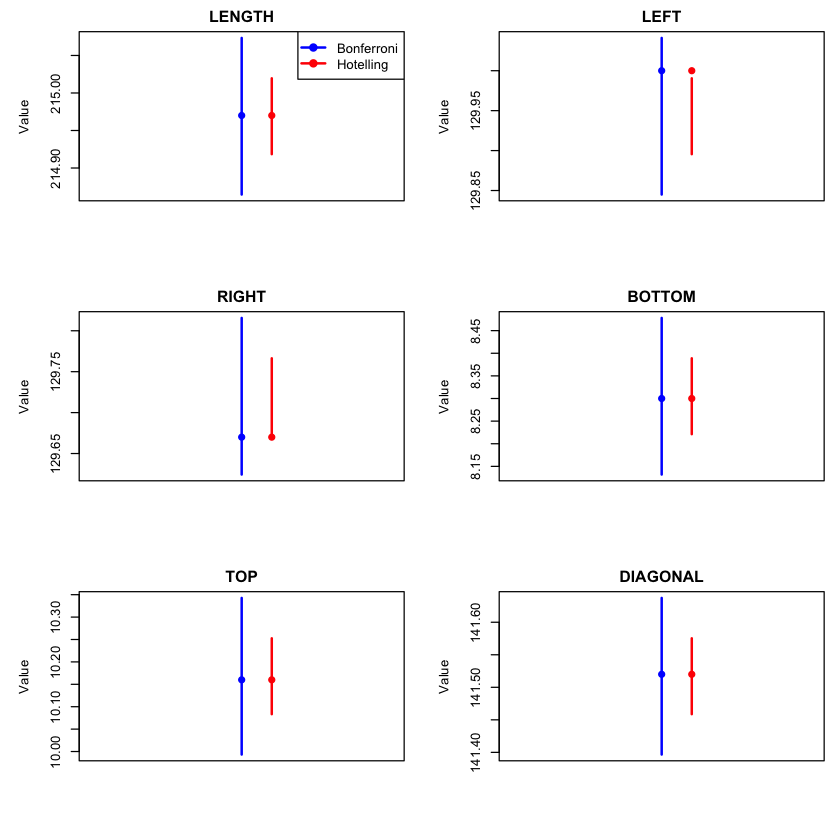

In [59]:
plot_confidence_intervals <- function(lower_bonf, upper_bonf, lower_hotelling, upper_hotelling, mean_vector) {
  dimensions <- colnames(data)

  par(mfrow = c(3, 2), mar = c(5, 5, 2, 1), bg= "white")

  for (i in 1:length(dimensions)) {
    plot(c(0.5, 1.5), range(c(lower_bonf[i], upper_bonf[i], lower_hotelling[i], upper_hotelling[i])),
         type = "n", xaxt = "n", ylab = "Value", xlab = "", main = dimensions[i])

    segments(1, lower_bonf[i], 1, upper_bonf[i], lwd = 2, col = "blue")
    points(1, mean_vector[i], pch = 19, col = "blue")

    segments(1.1, lower_hotelling[i], 1.1, upper_hotelling[i], lwd = 2, col = "red")
    points(1.1, mean_vector[i], pch = 19, col = "red")

    if (i == 1) {
      legend("topright", legend = c("Bonferroni", "Hotelling"),
             col = c("blue", "red"), lwd = 2, pch = 19)
    }
  }
}
plot_confidence_intervals(Bonf_intervals[1,], Bonf_intervals[2,], lower_hotelling, upper_hotelling, m0)

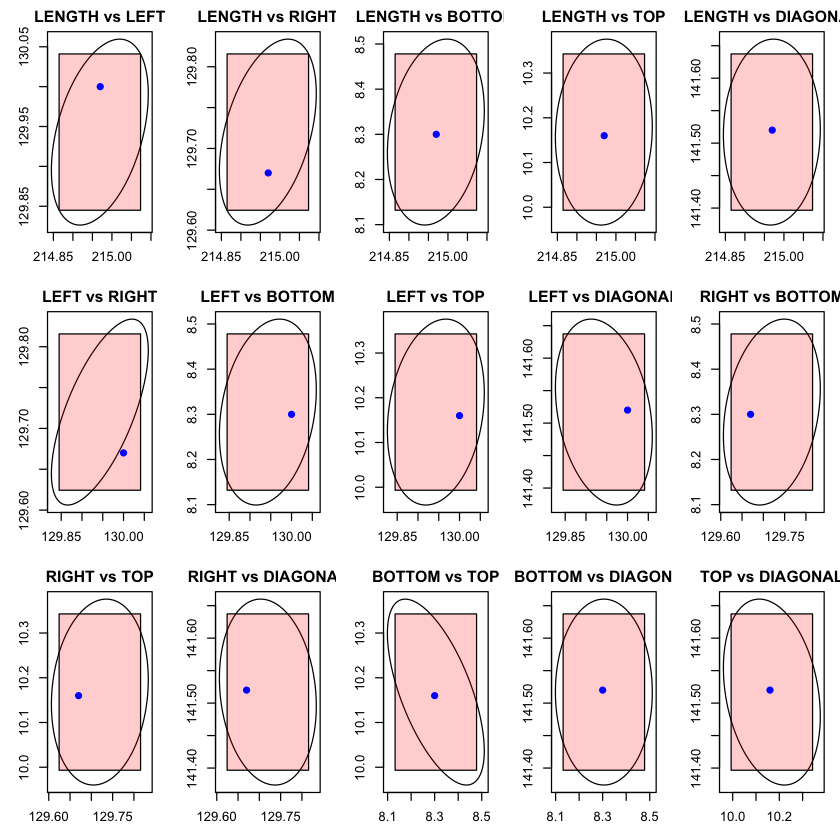

In [60]:
# project 2.7
plot_confidence_regions <- function(data, mean_vector) {
  means <- colMeans(data)
  cov_matrix <- cov(data)
  p <- ncol(data)
  intervals <- bonferroni_intervals(data) 
  variable_names <- c('LENGTH', 'LEFT', 'RIGHT', 'BOTTOM', 'TOP', 'DIAGONAL')  # Variable names
  
  par(mfrow = c(3, 5), mar = c(3, 3, 2, 1), bg = "white")
  
  for (i in 1:(p - 1)) {
    for (j in (i + 1):p) {
      plot(ellipse(cov_matrix[c(i, j), c(i, j)], centre = means[c(i, j)], level = 0.05), 
           type = 'l', 
           xlab = variable_names[i], 
           ylab = variable_names[j], 
           main = paste(variable_names[i], "vs", variable_names[j]))
      rect(
        xleft = intervals[1, i], 
        xright = intervals[2, i],
        ybottom = intervals[1, j], 
        ytop = intervals[2, j], 
        col = rgb(1, 0, 0, 0.2))
      points(mean_vector[i], mean_vector[j], pch = 19, col = "blue")
    }
  }
}

plot_confidence_regions(data,m0)


[1] "Inside Hotelling’s confidence region:"
     [,1]
[1,] TRUE
[1] "Inside Bonferroni’s confidence region:"
  LENGTH     LEFT    RIGHT   BOTTOM      TOP DIAGONAL 
    TRUE     TRUE     TRUE    FALSE    FALSE     TRUE 


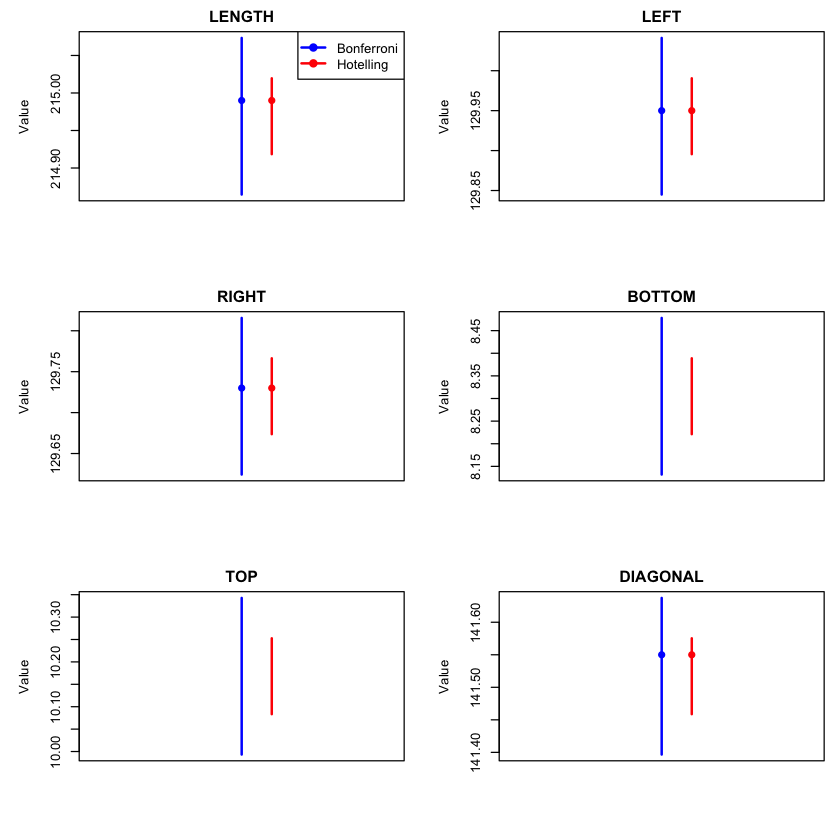

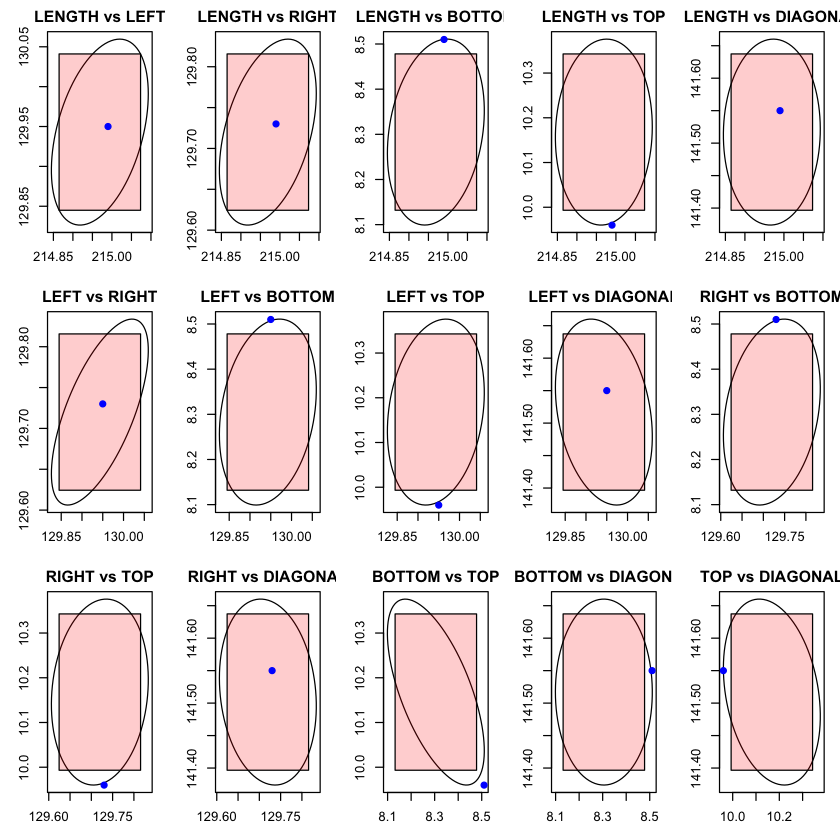

In [61]:
# project 2.9
m1 = c(214.99, 129.95, 129.73, 8.51, 9.96, 141.55)

print("Inside Hotelling’s confidence region:")
m1_test <- hotelling_test(m1, mean_vector, cov_matrix, n)
print(m1_test$inside)


print("Inside Bonferroni’s confidence region:")
within_bonf_intervals <- (m1 >= Bonf_intervals[1,]) & (m1 <= Bonf_intervals[2,])
print(within_bonf_intervals)

plot_confidence_intervals(Bonf_intervals[1,], Bonf_intervals[2,], lower_hotelling, upper_hotelling, m1)
plot_confidence_regions(data,m1)

[1] "Inside Hotelling’s confidence region:"
     [,1]
[1,] TRUE
[1] "Inside Bonferroni’s confidence region:"
  LENGTH     LEFT    RIGHT   BOTTOM      TOP DIAGONAL 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 


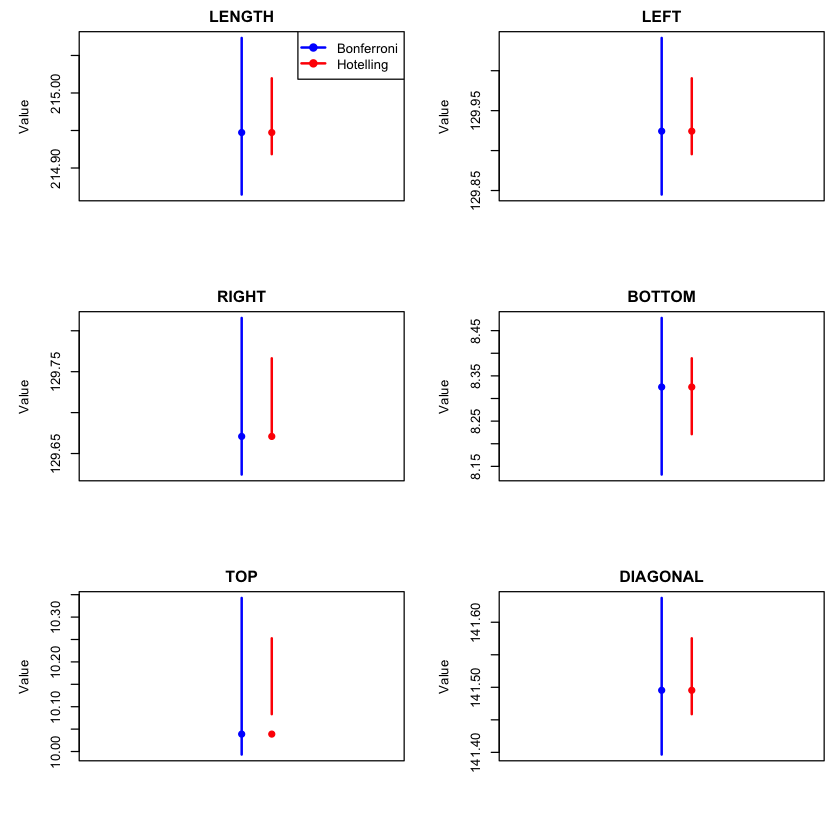

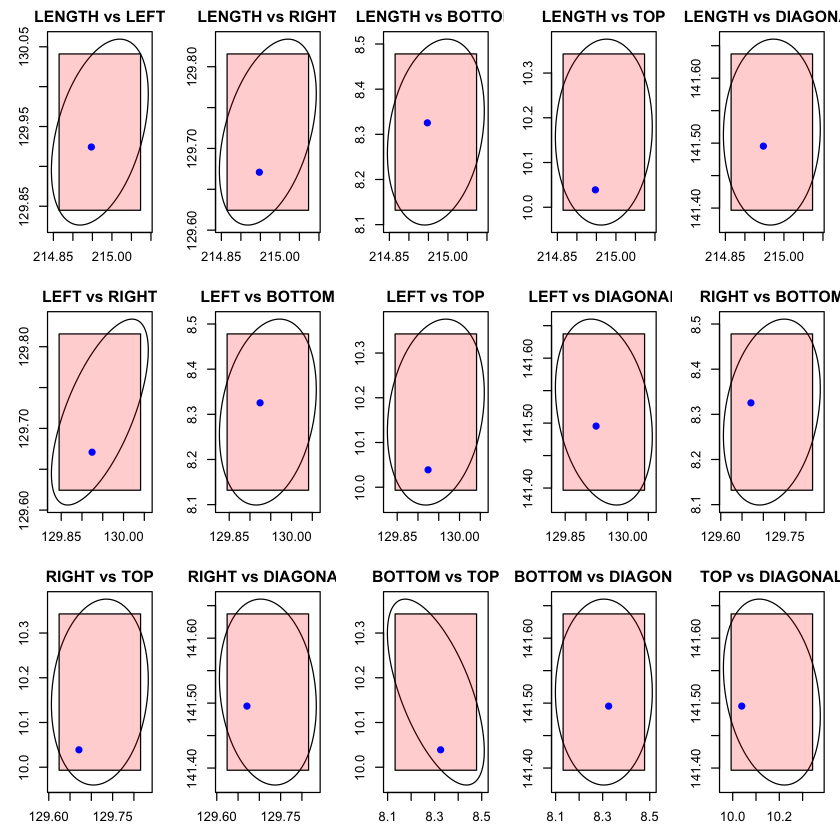

In [62]:
# project 2.10
m2 <- c(214.9473, 129.9243, 129.6709, 8.3254, 10.0389, 141.4954)


print("Inside Hotelling’s confidence region:")
m2_test <- hotelling_test(m2, mean_vector, cov_matrix, n)
print(m2_test$inside)


print("Inside Bonferroni’s confidence region:")
within_bonf_intervals <- (m2 >= Bonf_intervals[1,]) & (m2 <= Bonf_intervals[2,])
print(within_bonf_intervals)
plot_confidence_intervals(Bonf_intervals[1,], Bonf_intervals[2,], lower_hotelling, upper_hotelling, m2)
plot_confidence_regions(data,m2)


In [63]:
# Simulation Multiple testing

p <- 5000
alpha <- 0.05
n <- 1000
mu_scenario_a <- c(rep(sqrt(2 * log(p)), 10), rep(0, p - 10))
mu_scenario_b <- c(rep(sqrt(2 * log(p)), 500), rep(0, p - 500))

simulate_experiment <- function(mu) {
  FWER_Bonferroni <- 0
  FWER_BH <- 0
  FDR_Bonferroni <- 0
  FDR_BH <- 0
  power_Bonferroni <- 0
  power_BH <- 0
  
  for (rep in 1:n) {

    Z <- rnorm(p, mean = mu, sd = 1)
    p_values <- pnorm(-abs(Z), lower.tail = TRUE) * 2 
    
    bonferroni_threshold <- alpha / p
    bonferroni_rejections <- p_values < bonferroni_threshold
    
    sorted_p <- sort(p_values)
    BH_thresholds <- (1:p) / p * alpha
    indices <- which(sorted_p < BH_thresholds)
    max_index <- if (length(indices) > 0) max(indices) else 0
    BH_rejections <- p_values <= (if (max_index > 0) sorted_p[max_index] else 1)  # Adjust the threshold
    
    true_nulls <- mu == 0
    false_positives_Bonf <- bonferroni_rejections & true_nulls
    false_positives_BH <- BH_rejections & true_nulls
    true_positives_Bonf <- bonferroni_rejections & !true_nulls
    true_positives_BH <- BH_rejections & !true_nulls
    
    FWER_Bonferroni <- FWER_Bonferroni + any(false_positives_Bonf)
    FWER_BH <- FWER_BH + any(false_positives_BH)
    FDR_Bonferroni <- FDR_Bonferroni + sum(false_positives_Bonf) / max(1, sum(bonferroni_rejections))
    FDR_BH <- FDR_BH + sum(false_positives_BH) / max(1, sum(BH_rejections))
    power_Bonferroni <- power_Bonferroni + sum(true_positives_Bonf) / sum(!true_nulls)
    power_BH <- power_BH + sum(true_positives_BH) / sum(!true_nulls)
  }
  
  list(
    FWER_Bonferroni = 1-(FWER_Bonferroni / n),
    FWER_BH = 1-(FWER_BH / n),
    FDR_Bonferroni = FDR_Bonferroni / n,
    FDR_BH = FDR_BH / n,
    power_Bonferroni = power_Bonferroni / n,
    power_BH = power_BH / n
  )
}

  
results_a <- simulate_experiment(mu_scenario_a)
results_b <- simulate_experiment(mu_scenario_b)

print("Results for Scenario A:")
print(results_a)
print("Results for Scenario B:")
print(results_b)


[1] "Results for Scenario A:"
$FWER_Bonferroni
[1] 0.945

$FWER_BH
[1] 0.715

$FDR_Bonferroni
[1] 0.0129619

$FDR_BH
[1] 0.05942743

$power_Bonferroni
[1] 0.3872

$power_BH
[1] 0.549

[1] "Results for Scenario B:"
$FWER_Bonferroni
[1] 0.963

$FWER_BH
[1] 0

$FDR_Bonferroni
[1] 0.0001965237

$FDR_BH
[1] 0.04539915

$power_Bonferroni
[1] 0.384756

$power_BH
[1] 0.90365

